# Pandas 数据特征的获取  

一组数据的特征可通过某种**有损**的过程进行提取。常常使用的方法有：  
* 基本统计（包括排序）  
* 分布、累计统计  
* 数据特征：相关性等；  
* 数据挖掘（形成知识）  

**对有损的理解**：提取数据特征的过程，即把表示构成数据的主要信息提取出来，因此数据特征的提取一定是有损的，损失的多与少形成了特征提取的不同结果。


In [1]:
import numpy as np
import pandas as pd

## 1. 排序

### 1.1 sort_index 方法在指定轴上根据索引进行排序  

sort_index(axis=0, ascending=True)

**注意**：  

sort_index 方法直接修改了当前数据对象，并不是返回一个新对象！

In [5]:
b = pd.DataFrame(np.arange(20).reshape(4,5),index=list('abcd'))
b

,0,1,2,3,4
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19


In [11]:
b.sort_index(axis=0, ascending=False)

,0,1,2,3,4
d,15,16,17,18,19
c,10,11,12,13,14
b,5,6,7,8,9
a,0,1,2,3,4


In [8]:
b.sort_index(axis=1,ascending=True)

,0,1,2,3,4
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19


### 1.2 sort_values 方法在指定轴上根据数值进行排序，默认升序  

Series.sort_values(axis=0, ascending=True)  
DataFrame.sort_values(by, axis=0, ascending=True)  
by: axis轴上的某个索引或者索引列表

In [13]:
d = pd.DataFrame(np.arange(30).reshape(6,5),index=list('python'))
d

,0,1,2,3,4
p,0,1,2,3,4
y,5,6,7,8,9
t,10,11,12,13,14
h,15,16,17,18,19
o,20,21,22,23,24
n,25,26,27,28,29


In [25]:
d.sort_values(by=1,axis=0,ascending=False)

,0,1,2,3,4
n,25,26,27,28,29
o,20,21,22,23,24
h,15,16,17,18,19
t,10,11,12,13,14
y,5,6,7,8,9
p,0,1,2,3,4


In [24]:
d.sort_values(by='p',axis=1,ascending=False)

,4,3,2,1,0
p,4,3,2,1,0
y,9,8,7,6,5
t,14,13,12,11,10
h,19,18,17,16,15
o,24,23,22,21,20
n,29,28,27,26,25


```axis```  

axis 指的并不是行或列，而是水平方向或者垂直方向。  
axis = 1 指水平方向；
axis = 0 指垂直方向；

## 2. 基本统计分析函数

基本的统计分析函数：适用于 Series 和 DataFrame 类型

|      方法       |              说明                     |
|-----------------|-------------------------------------- |
| ``sum()``       | ``计算数据的总和，默认0轴，下同``        |
| ``count()``       | ``非NaN值的数量；``                    |
| ``mean(),median()`` | ``算术平均值和中位数``              | 
| ``var(), std()``    | ``数据的方差、标准差``              |
| ``min(),max()`` | ``最小值、最大值``                        |
| ``describe()`` | ``生成总体的基本统计数据``                        |

基本的统计分析函数：仅适用于 Series 类型

|      方法       |              说明                     |
|-----------------|-------------------------------------- |
| ``argmin(),argmax()``| ``计算数据最大值、最小值所在位置的索引位置（自动索引）``        |
| ``idxmin(),idxmax()``| ``计算数据最大值、最小值所在位置的索引位置（自定义索引）``                    |

In [12]:
a = pd.Series([9,8,7,6],index=['a','b','c','d'])
a.describe()

count    4.000000
mean     7.500000
std      1.290994
min      6.000000
25%      6.750000
50%      7.500000
75%      8.250000
max      9.000000
dtype: float64

In [27]:
type(a.describe())

pandas.core.series.Series

In [28]:
a.describe()['count']

4.0

In [13]:
b = pd.DataFrame(np.arange(10).reshape(5,2),index=['a','b','c','d','e'])
b

,0,1
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [14]:
b.describe()

,0,1
count,5.000000,5.000000
mean,4.000000,5.000000
std,3.162278,3.162278
min,0.000000,1.000000
25%,2.000000,3.000000
50%,4.000000,5.000000
75%,6.000000,7.000000
max,8.000000,9.000000


## 3. 累计统计分析  

对数据前n个数进行累计运算，减少使用 for 循环的开销。

累计统计分析函数：适用于 Series 和 DataFrame 类型

|      方法       |              说明                     |
|-----------------|-------------------------------------- |
| ``cumsum()``       | ``依次给出前1、2、...n个数据的和``        |
| ``cumprod()``       | ``依次给出前1、2、...n个数据的积``       |
| ``cummax()`` | ``依次给出前1、2、...n个数据中的最大值``              | 
| ``cummin()``    | ``依次给出前1、2、...n个数据中的最小值``              |

In [15]:
df = pd.DataFrame(np.arange(20).reshape(5,4),index=list('abcde'))
df

,0,1,2,3
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [16]:
df.cumsum()

,0,1,2,3
a,0,1,2,3
b,4,6,8,10
c,12,15,18,21
d,24,28,32,36
e,40,45,50,55


In [44]:
df.cumprod()

,0,1,2,3
a,0,1,2,3
b,0,5,12,21
c,0,45,120,231
d,0,585,1680,3465
e,0,9945,30240,65835


In [46]:
df.cummax()

,0,1,2,3
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [48]:
df.cummin()

,0,1,2,3
a,0,1,2,3
b,0,1,2,3
c,0,1,2,3
d,0,1,2,3
e,0,1,2,3


累计统计分析函数：适用于 Series 和 DataFrame 类型，滚动计算（窗口计算）

|      方法       |              说明                     |
|-----------------|-------------------------------------- |
| ``.rolling(w).sum()``| ``依次计算相邻w个元素的和``        |
| ``.rolling(w).mean()``| ``依次计算相邻w个元素的平均值``       |
| ``.rolling(w).var()``| ``依次计算相邻w个元素的方差``        | 
| ``.rolling(w).std()``| ``依次计算相邻w个元素的标准差``        |
| ``.rolling(w).min()``| ``依次计算相邻w个元素的最小值``        |
| ``.rolling(w).max()``| ``依次计算相邻w个元素的最大值``        |

In [50]:
df

,0,1,2,3
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11
d,12,13,14,15
e,16,17,18,19


In [51]:
df.rolling(2).sum()

,0,1,2,3
a,NaN,NaN,NaN,NaN
b,4.0,6.0,8.0,10.0
c,12.0,14.0,16.0,18.0
d,20.0,22.0,24.0,26.0
e,28.0,30.0,32.0,34.0


In [17]:
df.rolling(3).sum()

,0,1,2,3
a,NaN,NaN,NaN,NaN
b,NaN,NaN,NaN,NaN
c,12.0,15.0,18.0,21.0
d,24.0,27.0,30.0,33.0
e,36.0,39.0,42.0,45.0


## 【案例】绘制股票走势图

金融时间序列数据是金融中最重要的数据类型之一。 这是按日期和/或时间索引的数据。 例如，股票在一段时间内的价格代表了金融时间序列数据。 本节案例研究股票数据价格中蕴含的信息。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 0. 加载并整理数据集

In [3]:
pd.read_csv('data\\GOOG.csv',encoding='utf-8')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-09,806.400024,809.966003,802.830017,806.650024,806.650024,1274600
1,2017-01-10,807.859985,809.130005,803.510010,804.789978,804.789978,1176800
2,2017-01-11,805.000000,808.150024,801.369995,807.909973,807.909973,1065900
3,2017-01-12,807.140015,807.390015,799.169983,806.359985,806.359985,1353100
4,2017-01-13,807.479980,811.223999,806.690002,807.880005,807.880005,1099200
...,...,...,...,...,...,...,...
1254,2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864400
1255,2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
1256,2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
1257,2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100


```数据说明```：  

谷歌公司2021年1月6日至2022年1月6日期间的股票价格：  
* Open: 开盘价  
* High：最高价  
* Low: 最低价  
* Close：收盘价  
* Adj Close：调整后的收盘价  
* 成交量

将指定的股票数据加载、合并为一个DataFrame

In [5]:
names = ['GOOG','BABA','AAPL','MSFT']
stocks_df = pd.read_csv(f'data\\{names[0]}.csv',usecols=['Date','Adj Close']) # usecols:只选择希望读取的列
for i in range(1,len(names)):
    current = pd.read_csv(f'data\\{names[i]}.csv',usecols=['Date','Adj Close'])
    stocks_df = pd.merge(stocks_df, current, on='Date',suffixes=(f'_{i}',f'_{i+1}'))
    #print(stocks_df.head())
stocks_df.columns = ['Date'] + names
stocks_df = stocks_df.set_index('Date')
stocks_df

,GOOG,BABA,AAPL,MSFT
Date,,,,
2017-01-09,806.650024,94.720001,28.000778,58.241299
2017-01-10,804.789978,96.750000,28.029020,58.222710
2017-01-11,807.909973,96.940002,28.179625,58.752678
2017-01-12,806.359985,95.900002,28.061968,58.213409
2017-01-13,807.880005,96.269997,28.012548,58.297092
...,...,...,...,...
2021-12-31,2893.590088,118.790001,177.570007,336.320007
2022-01-03,2901.489990,120.379997,182.009995,334.750000
2022-01-04,2888.330078,119.559998,179.699997,329.010010


In [10]:
stocks_df.describe()

,GOOG,BABA,AAPL,MSFT
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,1450.239932,186.363145,74.023240,152.428130
std,598.939751,44.390519,41.487600,77.406957
min,795.695007,94.720001,28.000778,57.925179
25%,1060.219971,160.599998,41.485741,89.937508
50%,1198.849976,180.839996,52.600895,132.572815
75%,1581.085022,211.480004,115.452938,210.764259
max,3014.179932,317.140015,182.009995,343.109985


In [11]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2017-01-09 to 2022-01-06
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    1259 non-null   float64
 1   BABA    1259 non-null   float64
 2   AAPL    1259 non-null   float64
 3   MSFT    1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2+ KB


## 1. 绘制收盘价格趋势图

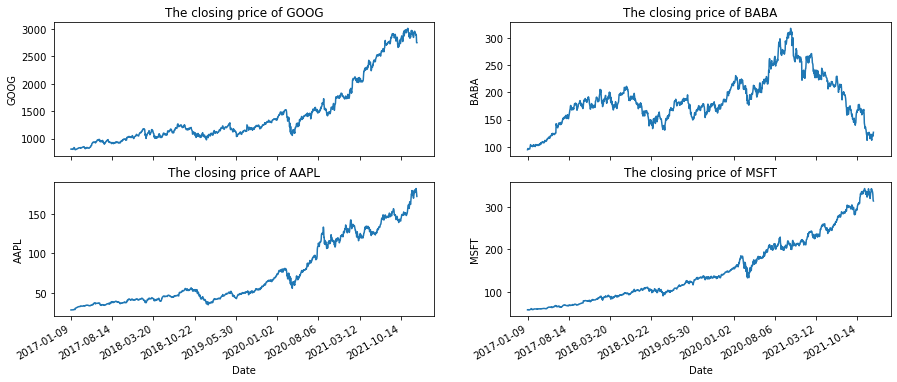

In [8]:
fig = plt.figure(figsize=(15,6))

for i in range(len(names)):
    plt.subplot(2, 2, i+1)
    plt.plot(stocks_df.index, stocks_df[names[i]])
    plt.xticks(np.arange(0,len(stocks_df),150)) # 调整横轴的刻度间隔
    fig.autofmt_xdate() # 将横轴的时间格式自动调整
    plt.xlabel('Date')
    plt.ylabel(names[i])
    plt.title(f'The closing price of {names[i]}')
plt.show()

## 2. 绘制移动平均价格曲线

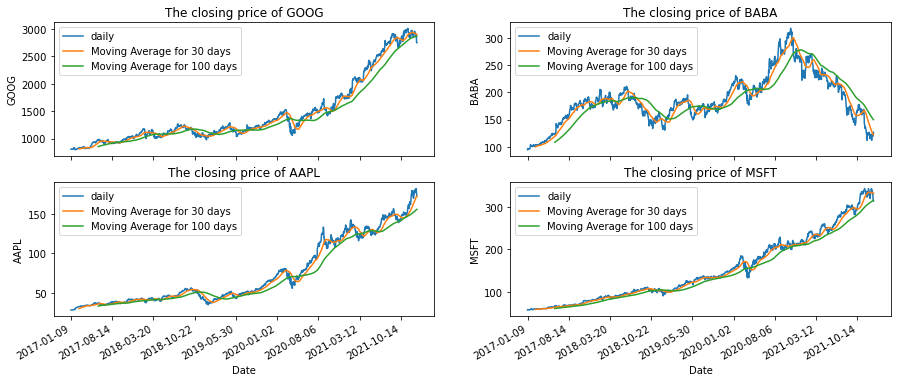

In [9]:
fig = plt.figure(figsize=(15,6))
for i in range(len(names)):
    plt.subplot(2, 2, i+1)
    plt.plot(stocks_df.index, stocks_df[names[i]],label='daily')
    for window_size in (30,100):
        plt.plot(stocks_df.index, stocks_df[names[i]].rolling(window_size).mean(),
                label=f'Moving Average for {window_size} days')
    plt.xticks(np.arange(0,len(stocks_df),150))
    fig.autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel(names[i])
    plt.legend()
    plt.title(f'The closing price of {names[i]}')

## 3. 计算并绘制日均收益曲线图

* 什么是日均收益?

当日减去前一日除以前一日的股价就是今天的日收益

In [11]:
stocks_df.shift(1)

,GOOG,BABA,AAPL,MSFT
Date,,,,
2017-01-09,NaN,NaN,NaN,NaN
2017-01-10,806.650024,94.720001,28.000778,58.241299
2017-01-11,804.789978,96.750000,28.029020,58.222710
2017-01-12,807.909973,96.940002,28.179625,58.752678
2017-01-13,806.359985,95.900002,28.061968,58.213409
...,...,...,...,...
2021-12-31,2920.050049,122.989998,178.199997,339.320007
2022-01-03,2893.590088,118.790001,177.570007,336.320007
2022-01-04,2901.489990,120.379997,182.009995,334.750000


dropna: 如果某一行或者某一列包含nan，那么删除整行或者整列，或者nan所在的行和列。由参数决定。

In [12]:
daily_rt =((stocks_df['GOOG'].shift(1) - stocks_df['GOOG'])/stocks_df['GOOG']).dropna()
daily_rt

Date
2017-01-10    0.002311
2017-01-11   -0.003862
2017-01-12    0.001922
2017-01-13   -0.001881
2017-01-17    0.004064
                ...   
2021-12-31    0.009144
2022-01-03   -0.002723
2022-01-04    0.004556
2022-01-05    0.049131
2022-01-06    0.000745
Name: GOOG, Length: 1258, dtype: float64

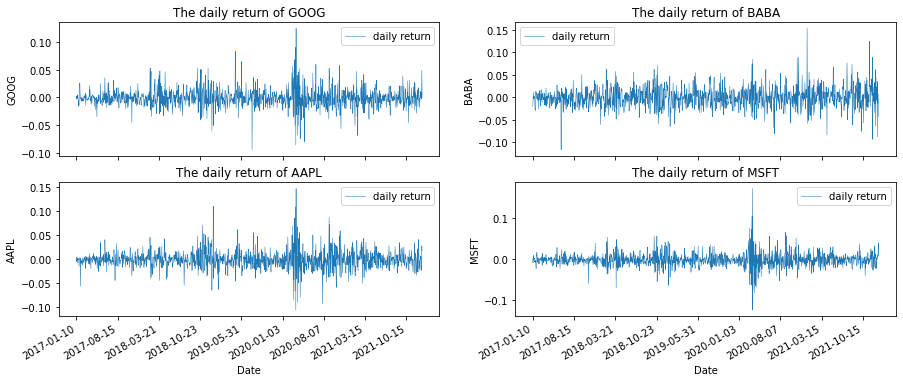

In [13]:
fig = plt.figure(figsize=(15,6))
for i in range(len(names)):
    plt.subplot(2, 2, i+1)
    # 计算日均收益
    daily_rt =((stocks_df[names[i]].shift(1) - 
                stocks_df[names[i]])/stocks_df[names[i]]).dropna()
    plt.plot(daily_rt.index, daily_rt,label='daily return',linewidth=0.5)
    plt.xticks(np.arange(0,len(stocks_df),150))
    fig.autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel(f'{names[i]}')
    plt.legend()
    plt.title(f'The daily return of {names[i]}')